In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Tetuan City power consumption.csv')

In [3]:
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [4]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [5]:
df.shape

(52416, 9)

In [6]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [7]:
df['Datetime'] = pd.to_datetime(df['DateTime'])

In [8]:
df.set_index('Datetime' , inplace=True)

In [9]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [10]:
df.drop('DateTime' , axis=1, inplace=True)

In [11]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [12]:
df.rename(columns={
    'Zone 1 Power Consumption': 'Zone1_Power',
    'Zone 2  Power Consumption': 'Zone2_Power',
    'Zone 3  Power Consumption': 'Zone3_Power'
}, inplace=True)
df

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1_Power,Zone2_Power,Zone3_Power
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


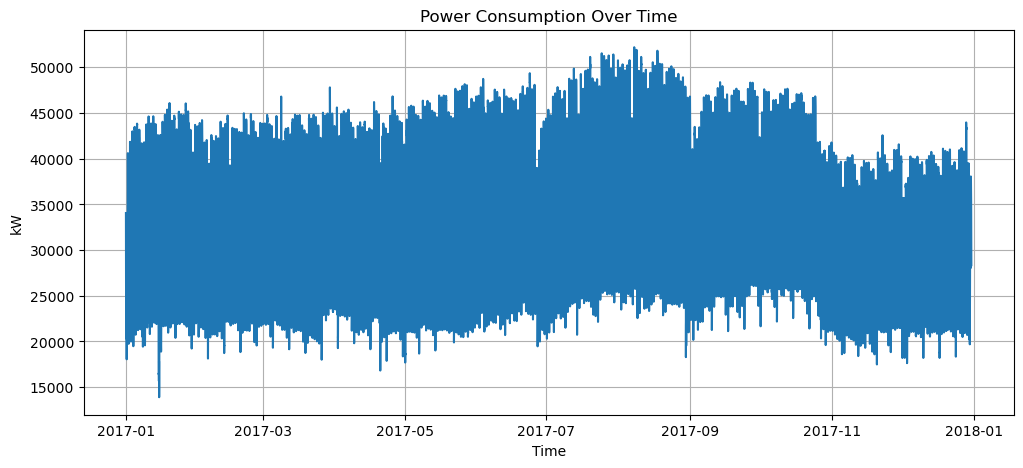

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df['Zone1_Power'])
plt.title('Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('kW')
plt.grid()
plt.show()

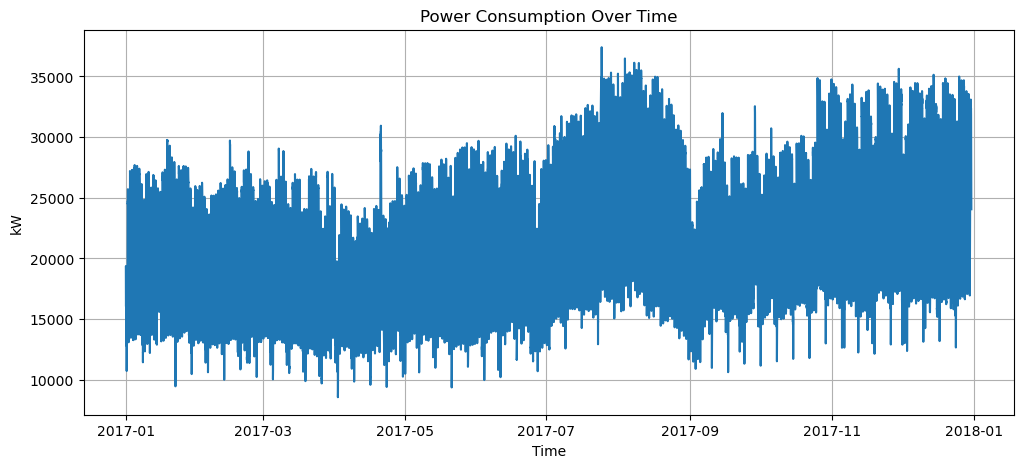

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df['Zone2_Power'])
plt.title('Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('kW')
plt.grid()
plt.show()

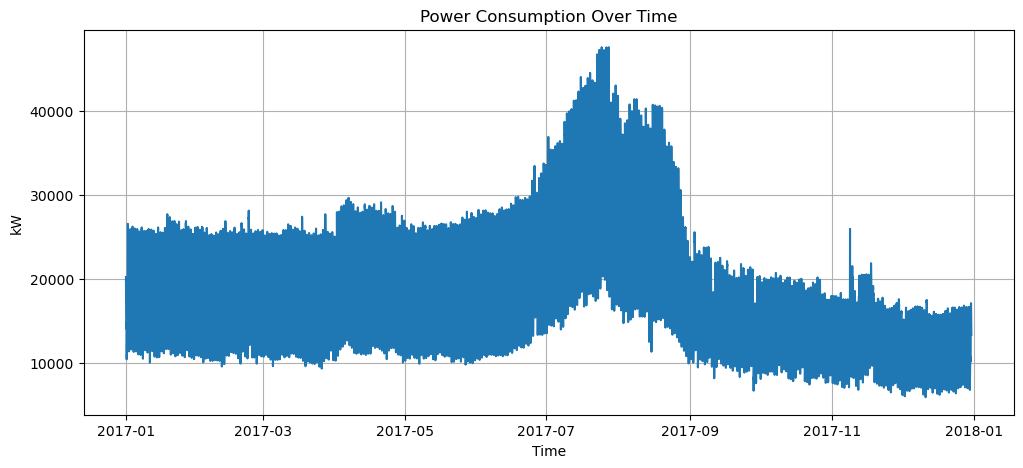

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Zone3_Power'])
plt.title('Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('kW')
plt.grid()
plt.show()

<Axes: >

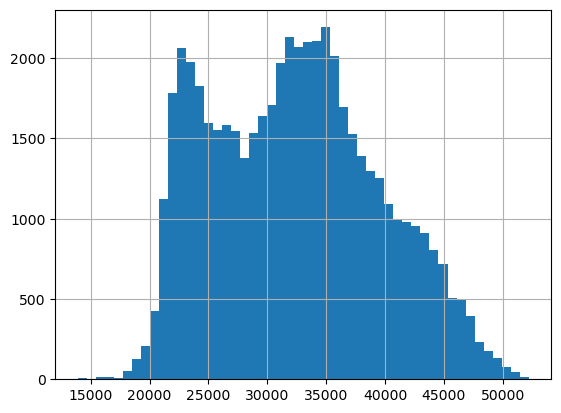

In [16]:
df['Zone1_Power'].hist(bins=50)

In [17]:
df['Zone1_Power'].skew()

0.22886368850887415

<Axes: >

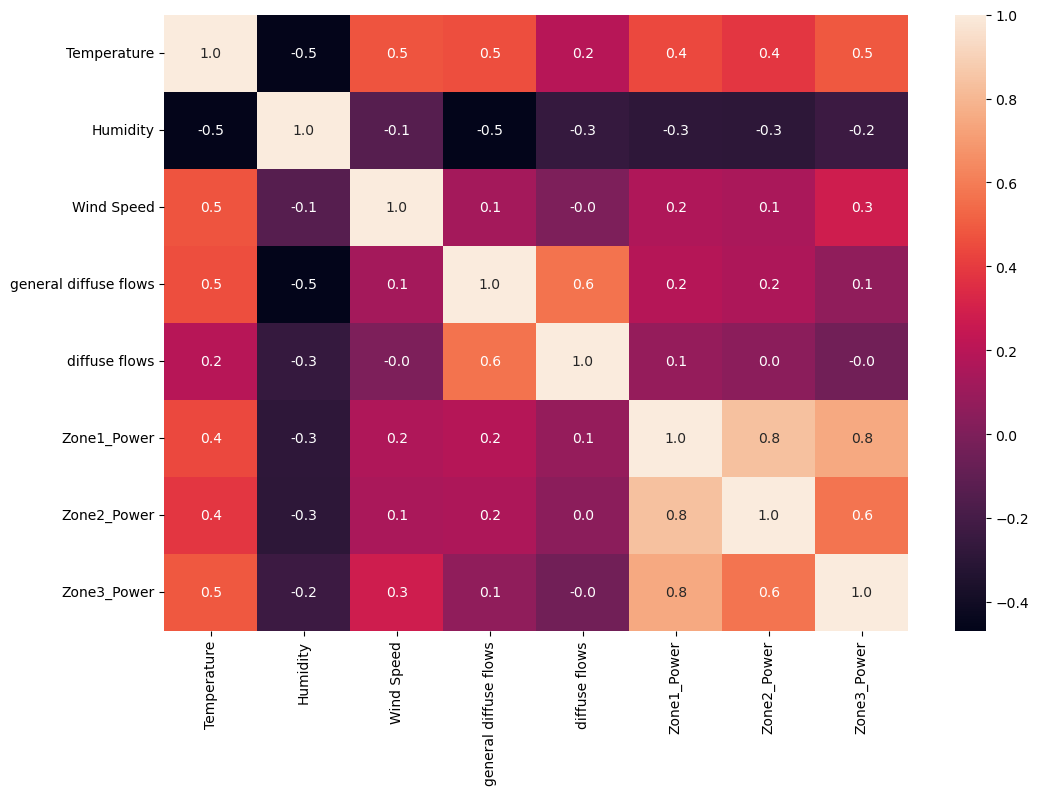

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True,fmt=".1f")

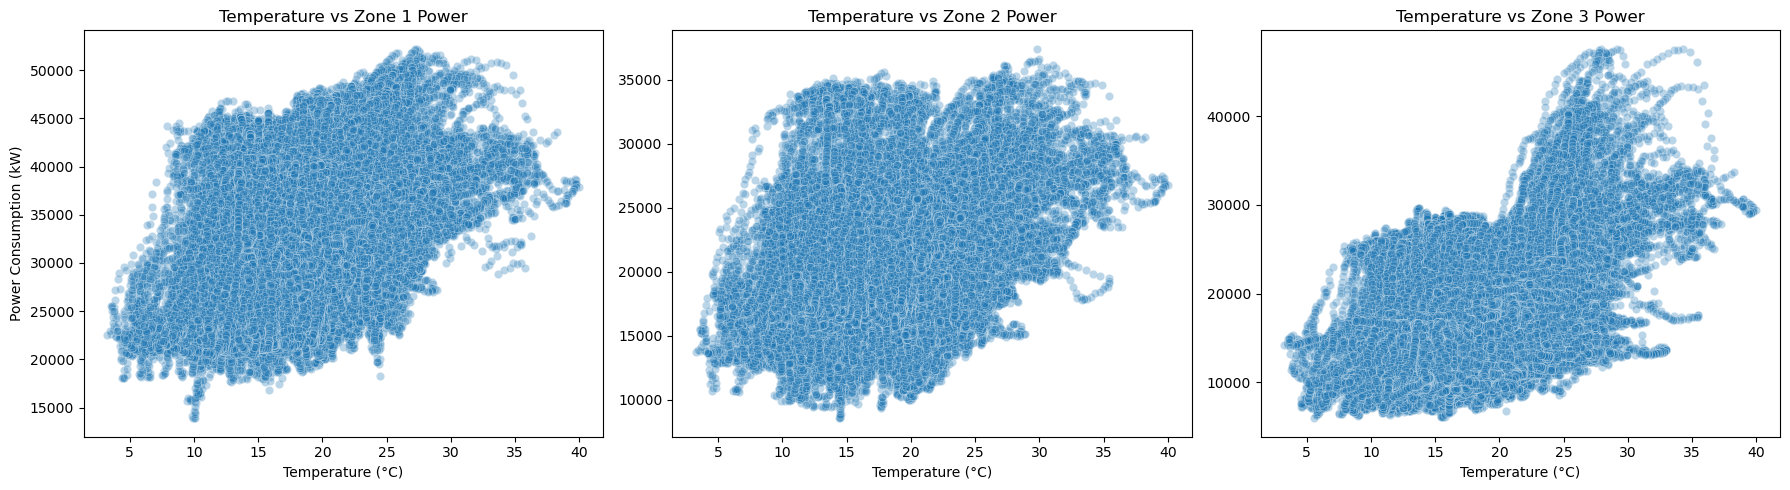

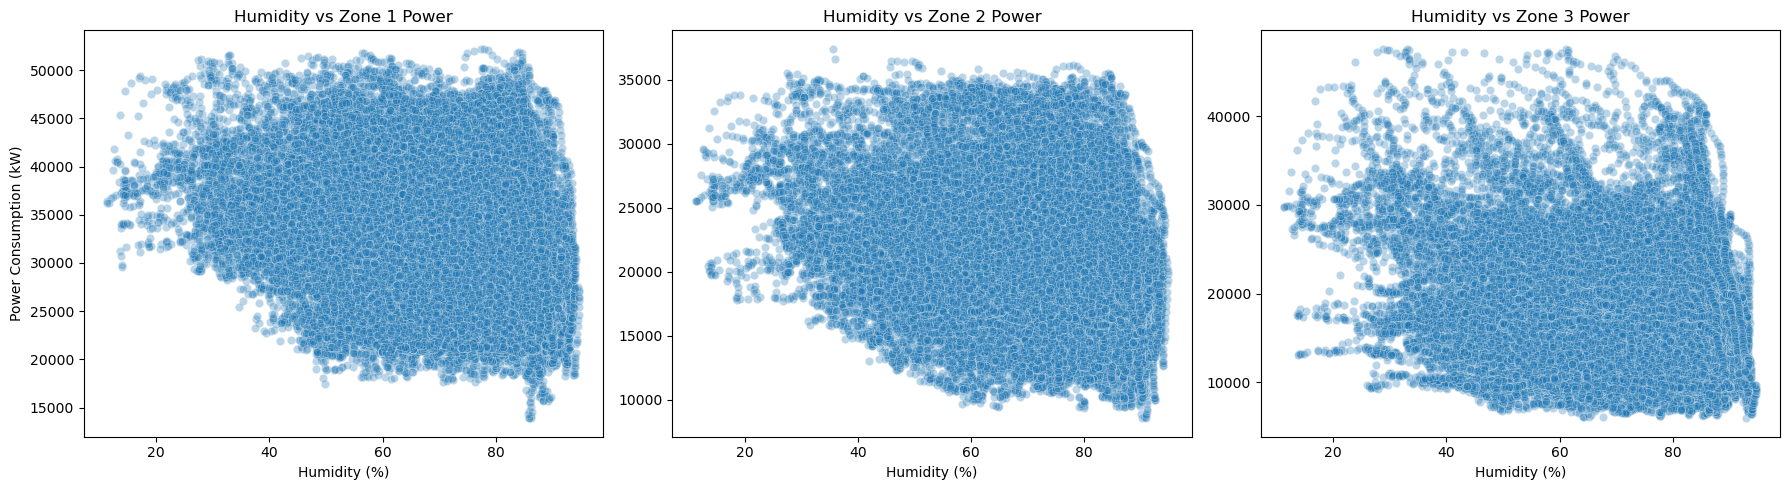

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots: Temperature vs Power Consumption (all zones)
plt.figure(figsize=(18, 5))

# Zone 1
plt.subplot(1, 3, 1)
sns.scatterplot(x='Temperature', y='Zone1_Power', data=df, alpha=0.3)
plt.title('Temperature vs Zone 1 Power')
plt.xlabel('Temperature (°C)')
plt.ylabel('Power Consumption (kW)')

# Zone 2
plt.subplot(1, 3, 2)
sns.scatterplot(x='Temperature', y='Zone2_Power', data=df, alpha=0.3)
plt.title('Temperature vs Zone 2 Power')
plt.xlabel('Temperature (°C)')
plt.ylabel('')

# Zone 3
plt.subplot(1, 3, 3)
sns.scatterplot(x='Temperature', y='Zone3_Power', data=df, alpha=0.3)
plt.title('Temperature vs Zone 3 Power')
plt.xlabel('Temperature (°C)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Scatter plots: Humidity vs Power Consumption (all zones)
plt.figure(figsize=(18, 5))

# Zone 1
plt.subplot(1, 3, 1)
sns.scatterplot(x='Humidity', y='Zone1_Power', data=df, alpha=0.3)
plt.title('Humidity vs Zone 1 Power')
plt.xlabel('Humidity (%)')
plt.ylabel('Power Consumption (kW)')

# Zone 2
plt.subplot(1, 3, 2)
sns.scatterplot(x='Humidity', y='Zone2_Power', data=df, alpha=0.3)
plt.title('Humidity vs Zone 2 Power')
plt.xlabel('Humidity (%)')
plt.ylabel('')

# Zone 3
plt.subplot(1, 3, 3)
sns.scatterplot(x='Humidity', y='Zone3_Power', data=df, alpha=0.3)
plt.title('Humidity vs Zone 3 Power')
plt.xlabel('Humidity (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [20]:
# Feature enginerig - time bases

df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Weekday'] = df.index.weekday
df['Month'] = df.index.month
df['IsWeekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [21]:
df

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1_Power,Zone2_Power,Zone3_Power,Hour,Day,Weekday,Month,IsWeekend
Datetime,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,1,6,1,1
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,1,6,1,1
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,1,6,1,1
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,1,6,1,1
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,30,5,12,1
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,30,5,12,1
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,30,5,12,1


In [22]:
df.isnull().sum()

Temperature              0
Humidity                 0
Wind Speed               0
general diffuse flows    0
diffuse flows            0
Zone1_Power              0
Zone2_Power              0
Zone3_Power              0
Hour                     0
Day                      0
Weekday                  0
Month                    0
IsWeekend                0
dtype: int64

In [23]:
features = [
    'Temperature', 'Humidity', 'Wind Speed',
    'Hour', 'Day', 'Weekday', 'Month', 'IsWeekend'
]

X = df[features]
y = df['Zone1_Power']  # target variable

X_train,X_test,y_train,y_test = train_test_split(X,y, shuffle=False , test_size = 0.2)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [27]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

r2_lr = r2_score(y_test, y_pred_lr)
print("R²:", r2_score(y_test, y_pred_lr))

MAE: 3588.265930296856
RMSE: 4415.065140621403
R²: 0.4873591639569619


In [28]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

r2_rf = r2_score(y_test, y_pred_rf)
print("R²:", r2_score(y_test, y_pred_rf))

MAE: 4364.29699517547
RMSE: 4837.447960267627
R²: 0.3845800378230716


In [29]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R²': [r2_lr, r2_rf]
})

print(comparison)

               Model          MAE         RMSE        R²
0  Linear Regression  3588.265930  4415.065141  0.487359
1      Random Forest  4364.296995  4837.447960  0.384580


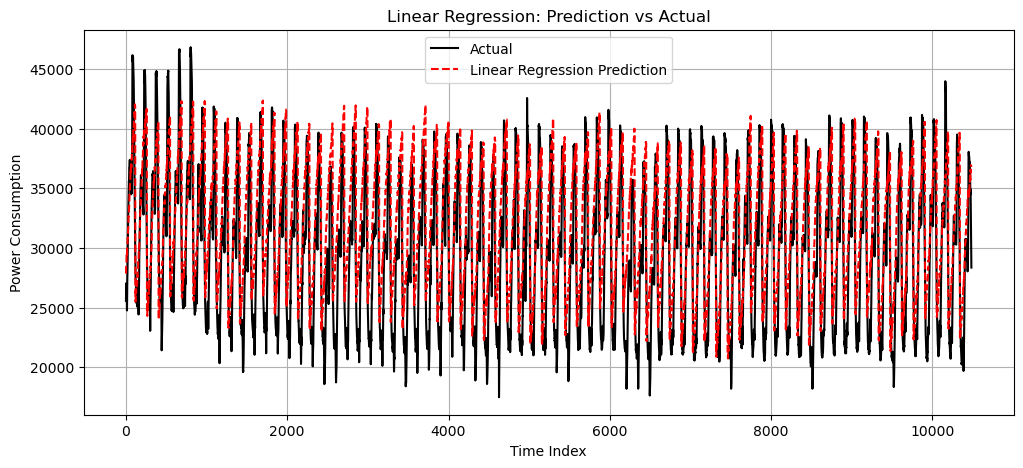

In [64]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_lr, label='Linear Regression Prediction', color='red', linestyle='--')
plt.title('Linear Regression: Prediction vs Actual')
plt.xlabel('Time Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.grid(True)
plt.show()

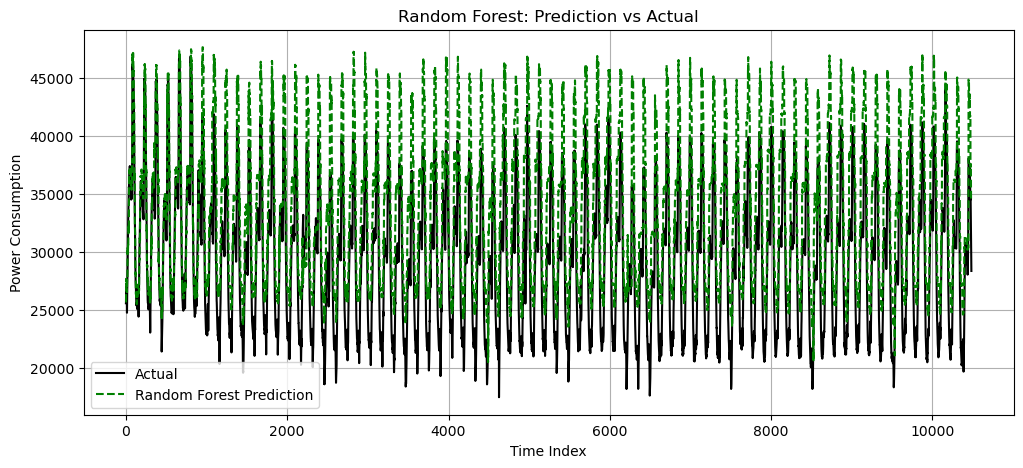

In [66]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_rf, label='Random Forest Prediction', color='green', linestyle='--')
plt.title('Random Forest: Prediction vs Actual')
plt.xlabel('Time Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.grid(True)
plt.show()